In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### KMeans on a randomly generated

In [4]:
np.random.seed(0)

In [10]:
x, y = make_blobs (n_samples=5000, centers=[[4,4],[-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
print(x)
print(y)

[[-1.84404118 -0.28877401]
 [-3.60739432  0.08772576]
 [ 0.92991426  0.47851945]
 ...
 [-0.32120512  1.0736936 ]
 [ 5.17487478  4.69595765]
 [ 3.55049575  1.48955502]]
[1 1 3 ... 3 0 3]


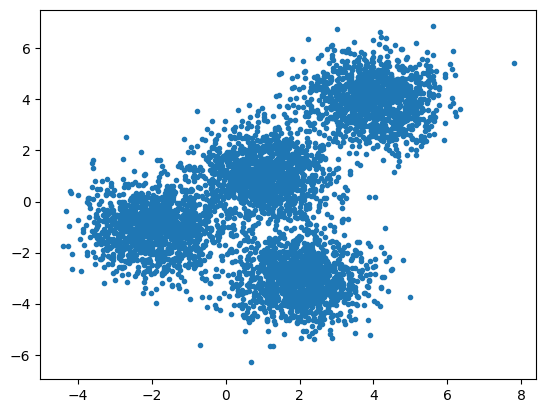

In [11]:
plt.scatter (x[:, 0], x[:, 1], marker = '.')

In [17]:
k_means = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)

In [19]:
k_means.fit(x)

KMeans(n_clusters=4, n_init=12)

In [20]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 3, 0, ..., 0, 2, 2], dtype=int32)

In [22]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.01557176,  1.03442098],
       [ 2.00811148, -3.01440138],
       [ 3.99211079,  3.99540917],
       [-1.95489462, -1.03564706]])

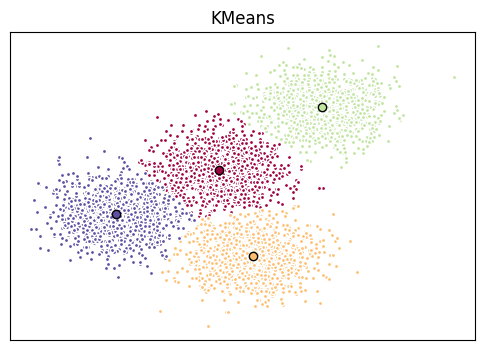

In [33]:
fig = plt.figure(figsize=(6, 4))

#color map
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

#create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots datapoints and clusters
# k will range from 0-3 for clusters

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    
    #create a list of all datapoints being in the cluster(ex. cluster 0)
    # are labeled as true, else they are false.
    my_members = (k_means_labels == k)
    
    #define centroids
    cluster_center = k_means_cluster_centers[k]
    
    #plot datapoints with color col
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    #plot the centroids
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
    
    
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()
